In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

BatchNorm for part c

In [5]:
# class Generator(nn.Module):
#     def __init__(self, nz):
#         super(Generator, self).__init__()
#         self.nz = nz
#         self.main = nn.Sequential(
#             nn.Linear(self.nz, 256),
#             nn.BatchNorm1d(256),
#             nn.LeakyReLU(0.2),
#             nn.Linear(256, 512),
#             nn.BatchNorm1d(512),
#             nn.LeakyReLU(0.2),
#             nn.Linear(512, 1024),
#             nn.BatchNorm1d(1024),
#             nn.LeakyReLU(0.2),
#             nn.Linear(1024, 784),
#             nn.Tanh(),
#         )
#     def forward(self, x):
#         return self.main(x).view(-1, 1, 28, 28)

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
        
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [7]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

In [8]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [9]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
noise = create_noise(sample_size, nz)

118it [00:11, 10.41it/s]                         


Epoch 1 of 100
Generator loss: 1.44035488, Discriminator loss: 0.86973656


118it [00:10, 11.19it/s]                         


Epoch 2 of 100
Generator loss: 2.48798739, Discriminator loss: 1.49514282


118it [00:10, 11.04it/s]                         


Epoch 3 of 100
Generator loss: 3.86142583, Discriminator loss: 0.50009109


118it [00:10, 10.82it/s]                         


Epoch 4 of 100
Generator loss: 1.98048973, Discriminator loss: 1.17462410


118it [00:10, 11.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


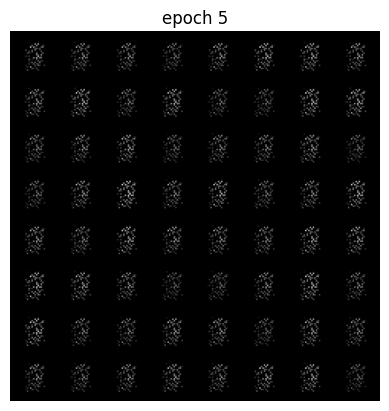

Epoch 5 of 100
Generator loss: 1.72463026, Discriminator loss: 0.98030704


118it [00:10, 10.93it/s]                         


Epoch 6 of 100
Generator loss: 2.09529912, Discriminator loss: 0.87883476


118it [00:10, 10.86it/s]                         


Epoch 7 of 100
Generator loss: 1.24688587, Discriminator loss: 1.20359539


118it [00:10, 11.02it/s]                         


Epoch 8 of 100
Generator loss: 1.37322979, Discriminator loss: 1.07486056


118it [00:10, 10.90it/s]                         


Epoch 9 of 100
Generator loss: 1.94496345, Discriminator loss: 0.92508649


118it [00:10, 10.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


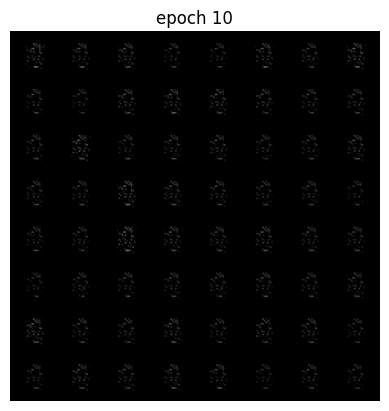

Epoch 10 of 100
Generator loss: 1.69584880, Discriminator loss: 1.13561011


118it [00:10, 10.87it/s]                         


Epoch 11 of 100
Generator loss: 2.12105998, Discriminator loss: 1.20747950


118it [00:10, 10.80it/s]                         


Epoch 12 of 100
Generator loss: 2.92517993, Discriminator loss: 1.50861325


118it [00:10, 10.89it/s]                         


Epoch 13 of 100
Generator loss: 2.39986226, Discriminator loss: 1.00298599


118it [00:10, 10.92it/s]                         


Epoch 14 of 100
Generator loss: 1.83181434, Discriminator loss: 1.04468047


118it [00:11, 10.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


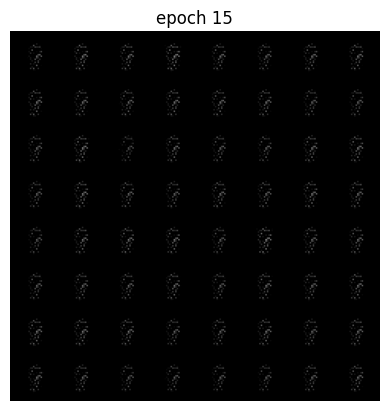

Epoch 15 of 100
Generator loss: 1.56883719, Discriminator loss: 1.06365377


118it [00:10, 10.90it/s]                         


Epoch 16 of 100
Generator loss: 2.83245329, Discriminator loss: 0.59625692


118it [00:10, 10.91it/s]                         


Epoch 17 of 100
Generator loss: 2.95436468, Discriminator loss: 1.24209738


118it [00:10, 10.83it/s]                         


Epoch 18 of 100
Generator loss: 2.00808232, Discriminator loss: 0.94675444


118it [00:10, 11.05it/s]                         


Epoch 19 of 100
Generator loss: 1.56535324, Discriminator loss: 0.80741260


118it [00:10, 10.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


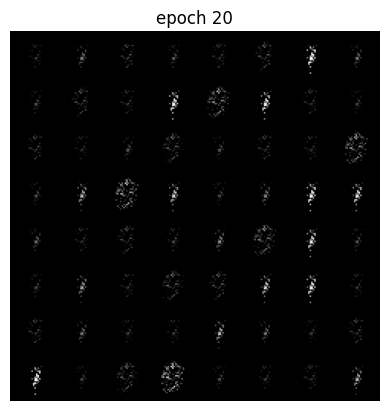

Epoch 20 of 100
Generator loss: 2.30807199, Discriminator loss: 0.71307374


118it [00:10, 11.05it/s]                         


Epoch 21 of 100
Generator loss: 1.71742858, Discriminator loss: 0.77392690


118it [00:10, 11.02it/s]                         


Epoch 22 of 100
Generator loss: 2.09508410, Discriminator loss: 0.60370029


118it [00:10, 10.75it/s]                         


Epoch 23 of 100
Generator loss: 2.80127455, Discriminator loss: 0.29640930


118it [00:10, 10.81it/s]                         


Epoch 24 of 100
Generator loss: 3.82293220, Discriminator loss: 0.30545568


118it [00:10, 10.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


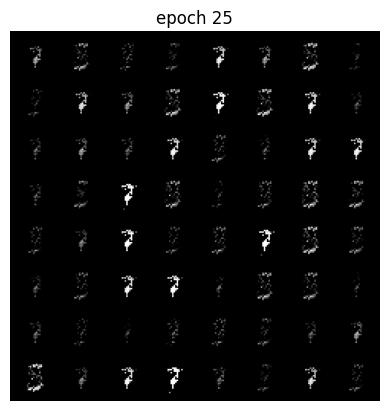

Epoch 25 of 100
Generator loss: 3.20317765, Discriminator loss: 0.55611819


118it [00:10, 10.93it/s]                         


Epoch 26 of 100
Generator loss: 3.01685503, Discriminator loss: 0.41083724


118it [00:10, 11.04it/s]                         


Epoch 27 of 100
Generator loss: 3.13800124, Discriminator loss: 0.33615856


118it [00:10, 10.97it/s]                         


Epoch 28 of 100
Generator loss: 3.32395714, Discriminator loss: 0.42864931


118it [00:10, 10.87it/s]                         


Epoch 29 of 100
Generator loss: 3.10757844, Discriminator loss: 0.42809286


118it [00:10, 11.04it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


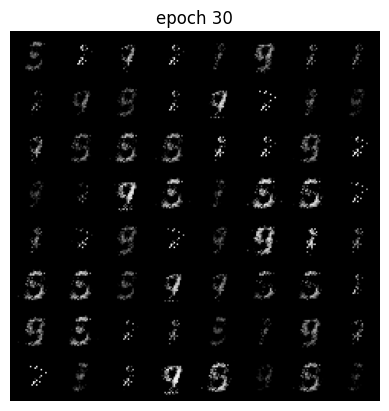

Epoch 30 of 100
Generator loss: 2.96474383, Discriminator loss: 0.48536611


118it [00:10, 10.88it/s]                         


Epoch 31 of 100
Generator loss: 3.15761803, Discriminator loss: 0.49345976


118it [00:10, 10.89it/s]                         


Epoch 32 of 100
Generator loss: 3.56877602, Discriminator loss: 0.37178739


118it [00:10, 10.98it/s]                         


Epoch 33 of 100
Generator loss: 3.42989179, Discriminator loss: 0.36942953


118it [00:10, 10.94it/s]                         


Epoch 34 of 100
Generator loss: 3.00860970, Discriminator loss: 0.44243949


118it [00:10, 10.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


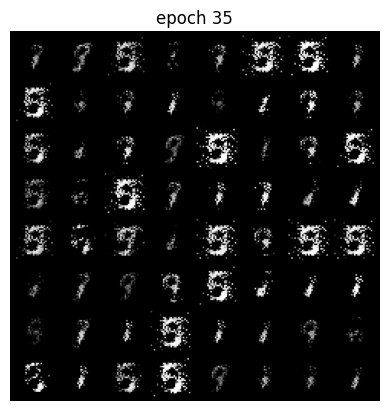

Epoch 35 of 100
Generator loss: 3.26655406, Discriminator loss: 0.44169811


118it [00:10, 10.88it/s]                         


Epoch 36 of 100
Generator loss: 3.06323420, Discriminator loss: 0.54862125


118it [00:10, 10.97it/s]                         


Epoch 37 of 100
Generator loss: 2.82537672, Discriminator loss: 0.58251716


118it [00:10, 10.92it/s]                         


Epoch 38 of 100
Generator loss: 2.60953746, Discriminator loss: 0.52536650


118it [00:10, 11.05it/s]                         


Epoch 39 of 100
Generator loss: 3.19839103, Discriminator loss: 0.42658587


118it [00:10, 11.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


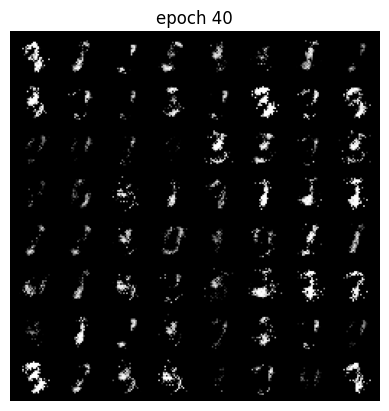

Epoch 40 of 100
Generator loss: 3.01439226, Discriminator loss: 0.55361652


118it [00:10, 10.82it/s]                         


Epoch 41 of 100
Generator loss: 3.07795626, Discriminator loss: 0.51099370


118it [00:10, 10.91it/s]                         


Epoch 42 of 100
Generator loss: 3.37931847, Discriminator loss: 0.44279023


118it [00:10, 10.89it/s]                         


Epoch 43 of 100
Generator loss: 3.03843909, Discriminator loss: 0.51390645


118it [00:10, 10.86it/s]                         


Epoch 44 of 100
Generator loss: 2.73939506, Discriminator loss: 0.52915282


118it [00:10, 10.98it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


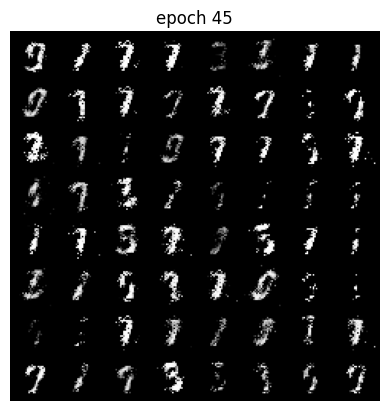

Epoch 45 of 100
Generator loss: 3.11492821, Discriminator loss: 0.44508411


118it [00:10, 10.90it/s]                         


Epoch 46 of 100
Generator loss: 2.99365385, Discriminator loss: 0.56015116


118it [00:10, 10.84it/s]                         


Epoch 47 of 100
Generator loss: 2.59598136, Discriminator loss: 0.56014651


118it [00:10, 11.05it/s]                         


Epoch 48 of 100
Generator loss: 2.85833106, Discriminator loss: 0.52809152


118it [00:10, 10.83it/s]                         


Epoch 49 of 100
Generator loss: 3.03061362, Discriminator loss: 0.45658972


118it [00:10, 10.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


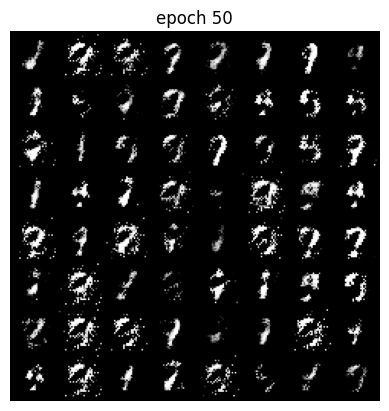

Epoch 50 of 100
Generator loss: 3.13579261, Discriminator loss: 0.50601401


118it [00:11, 10.71it/s]                         


Epoch 51 of 100
Generator loss: 2.86080426, Discriminator loss: 0.51623432


118it [00:10, 10.87it/s]                         


Epoch 52 of 100
Generator loss: 2.80582817, Discriminator loss: 0.53315842


118it [00:10, 10.79it/s]                         


Epoch 53 of 100
Generator loss: 2.93706253, Discriminator loss: 0.48791820


118it [00:10, 10.90it/s]                         


Epoch 54 of 100
Generator loss: 2.90147124, Discriminator loss: 0.52838275


118it [00:10, 10.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


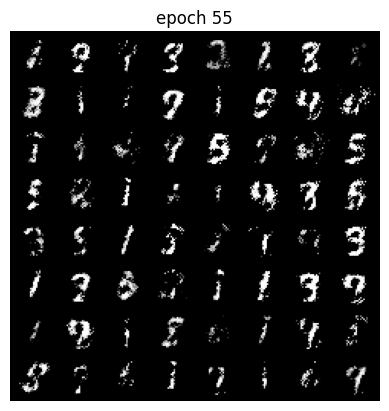

Epoch 55 of 100
Generator loss: 2.47487410, Discriminator loss: 0.67576752


118it [00:10, 10.99it/s]                         


Epoch 56 of 100
Generator loss: 2.49843177, Discriminator loss: 0.62074530


118it [00:10, 10.82it/s]                         


Epoch 57 of 100
Generator loss: 2.59610050, Discriminator loss: 0.56310948


118it [00:10, 10.84it/s]                         


Epoch 58 of 100
Generator loss: 2.72376296, Discriminator loss: 0.57056728


118it [00:10, 10.85it/s]                         


Epoch 59 of 100
Generator loss: 2.53100647, Discriminator loss: 0.57611701


118it [00:10, 10.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


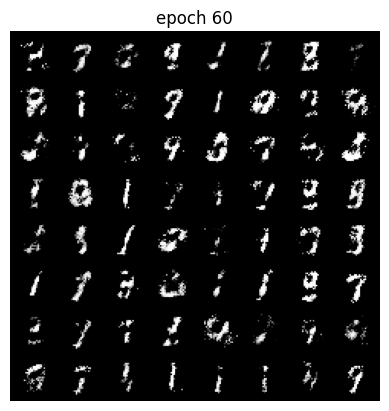

Epoch 60 of 100
Generator loss: 2.50990558, Discriminator loss: 0.59968469


118it [00:10, 10.90it/s]                         


Epoch 61 of 100
Generator loss: 2.54750503, Discriminator loss: 0.61109917


118it [00:10, 10.99it/s]                         


Epoch 62 of 100
Generator loss: 2.34867651, Discriminator loss: 0.66130954


118it [00:10, 11.05it/s]                         


Epoch 63 of 100
Generator loss: 2.40538822, Discriminator loss: 0.60041249


118it [00:11, 10.71it/s]                         


Epoch 64 of 100
Generator loss: 2.44492685, Discriminator loss: 0.59291384


118it [00:11, 10.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


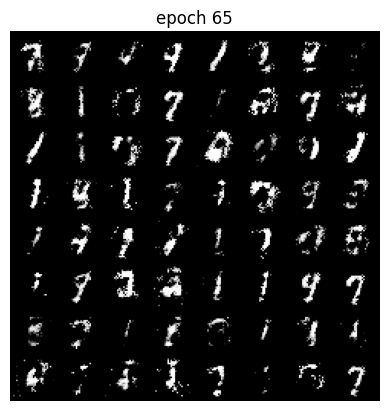

Epoch 65 of 100
Generator loss: 2.38723760, Discriminator loss: 0.60065759


118it [00:10, 10.79it/s]                         


Epoch 66 of 100
Generator loss: 2.41299715, Discriminator loss: 0.63537065


118it [00:10, 10.93it/s]                         


Epoch 67 of 100
Generator loss: 2.38796846, Discriminator loss: 0.64071108


118it [00:11, 10.49it/s]                         


Epoch 68 of 100
Generator loss: 2.31843716, Discriminator loss: 0.65809647


118it [00:22,  5.14it/s]                         


Epoch 69 of 100
Generator loss: 2.37117012, Discriminator loss: 0.66375509


118it [00:26,  4.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


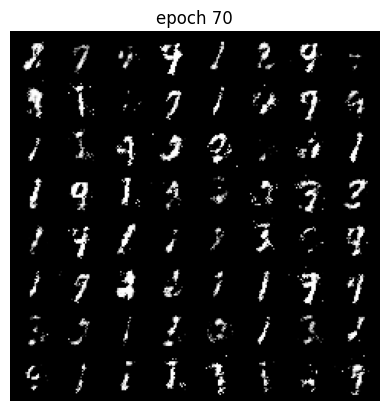

Epoch 70 of 100
Generator loss: 2.36997109, Discriminator loss: 0.63984720


118it [00:27,  4.36it/s]                         


Epoch 71 of 100
Generator loss: 2.32964302, Discriminator loss: 0.64924185


118it [00:26,  4.38it/s]                         


Epoch 72 of 100
Generator loss: 2.18878061, Discriminator loss: 0.70688580


118it [00:27,  4.35it/s]                         


Epoch 73 of 100
Generator loss: 2.17487682, Discriminator loss: 0.70128534


118it [00:26,  4.39it/s]                         


Epoch 74 of 100
Generator loss: 2.19453381, Discriminator loss: 0.69579646


118it [00:26,  4.42it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


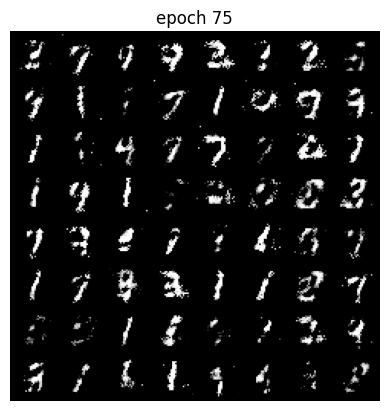

Epoch 75 of 100
Generator loss: 2.26604595, Discriminator loss: 0.69044726


118it [00:20,  5.74it/s]                         


Epoch 76 of 100
Generator loss: 2.25889569, Discriminator loss: 0.66164352


118it [00:15,  7.86it/s]                         


Epoch 77 of 100
Generator loss: 2.24648297, Discriminator loss: 0.71537252


118it [00:13,  9.05it/s]                         


Epoch 78 of 100
Generator loss: 2.23688658, Discriminator loss: 0.71643164


118it [00:12,  9.31it/s]                         


Epoch 79 of 100
Generator loss: 2.08881803, Discriminator loss: 0.75085863


118it [00:13,  9.08it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


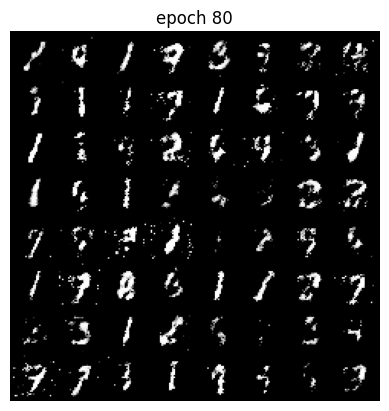

Epoch 80 of 100
Generator loss: 2.00579886, Discriminator loss: 0.78526354


118it [00:13,  8.77it/s]                         


Epoch 81 of 100
Generator loss: 2.06051296, Discriminator loss: 0.74692515


118it [00:13,  8.94it/s]                         


Epoch 82 of 100
Generator loss: 2.11602375, Discriminator loss: 0.73736050


118it [00:14,  8.22it/s]                         


Epoch 83 of 100
Generator loss: 2.06947712, Discriminator loss: 0.75397569


118it [00:12,  9.37it/s]                         


Epoch 84 of 100
Generator loss: 2.01313803, Discriminator loss: 0.75507789


118it [00:14,  8.31it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


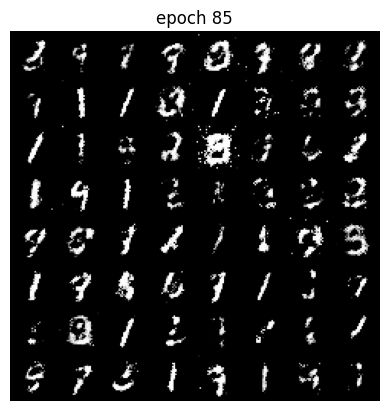

Epoch 85 of 100
Generator loss: 2.07648035, Discriminator loss: 0.74341987


118it [00:12,  9.26it/s]                         


Epoch 86 of 100
Generator loss: 2.05811028, Discriminator loss: 0.75026423


118it [00:12,  9.52it/s]                         


Epoch 87 of 100
Generator loss: 2.10528638, Discriminator loss: 0.73511470


118it [00:12,  9.55it/s]                         


Epoch 88 of 100
Generator loss: 2.09555660, Discriminator loss: 0.71163718


118it [00:12,  9.30it/s]                         


Epoch 89 of 100
Generator loss: 2.04705010, Discriminator loss: 0.76815278


118it [00:14,  7.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


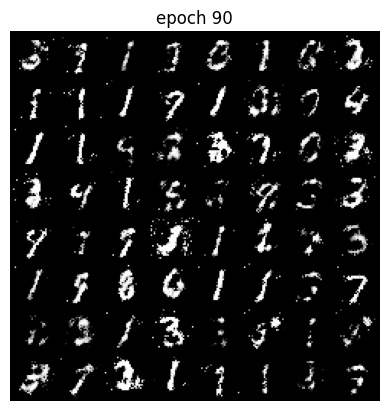

Epoch 90 of 100
Generator loss: 2.07502157, Discriminator loss: 0.76992321


118it [00:12,  9.09it/s]                         


Epoch 91 of 100
Generator loss: 1.98468411, Discriminator loss: 0.74932775


118it [00:12,  9.46it/s]                         


Epoch 92 of 100
Generator loss: 1.97942558, Discriminator loss: 0.77728811


118it [00:12,  9.51it/s]                         


Epoch 93 of 100
Generator loss: 2.00323877, Discriminator loss: 0.76960149


118it [00:12,  9.48it/s]                         


Epoch 94 of 100
Generator loss: 2.06158970, Discriminator loss: 0.75335242


118it [00:12,  9.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


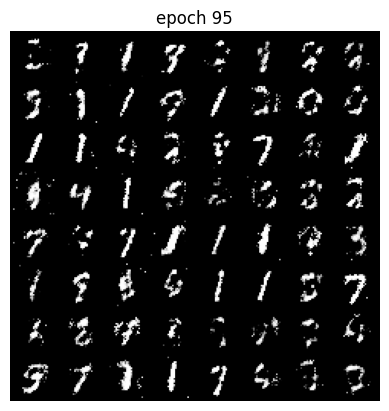

Epoch 95 of 100
Generator loss: 2.07619393, Discriminator loss: 0.76828200


118it [00:12,  9.54it/s]                         


Epoch 96 of 100
Generator loss: 2.09440373, Discriminator loss: 0.74578580


118it [00:12,  9.60it/s]                         


Epoch 97 of 100
Generator loss: 2.00971783, Discriminator loss: 0.77236655


118it [00:12,  9.59it/s]                         


Epoch 98 of 100
Generator loss: 2.09492189, Discriminator loss: 0.76257314


118it [00:12,  9.45it/s]                         


Epoch 99 of 100
Generator loss: 1.92040783, Discriminator loss: 0.81283497


118it [00:13,  8.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


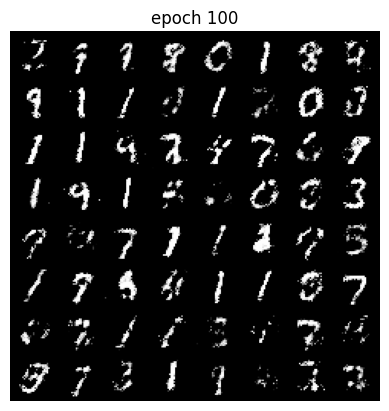

Epoch 100 of 100
Generator loss: 1.90887937, Discriminator loss: 0.81047218


In [14]:
torch.manual_seed(7777)
losses_g = []
losses_d = []
images = []
partb = False
# Pass image data through (x), generate guess, calculate loss
def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    if partb == True:
        loss = torch.mean(torch.log(1 - output))
        loss.backward(retain_graph=False)
        optim_g.step()
    else:
        loss = criterion(output, true_label)
        loss.backward(retain_graph=False)
        optim_g.step()
    return loss

# Pass 
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########   
    loss_real = criterion(output, true_label)
    output_fake = discriminator(image_fake)
    loss_fake = criterion(output_fake, fake_label)
    loss_real.backward(retain_graph=False)
    loss_fake.backward(retain_graph=False)
    optim_d.step()
    return loss_real + loss_fake
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    # bi is index
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        image = data[0].to(device)
        batch_size = len(image)
        true_label = label_real(batch_size)
        fake_label = label_fake(batch_size)

        # apply the discriminator for k steps
        for _ in range(k):
            image_fake = generator(create_noise(batch_size, nz)).detach()
            optim_d.zero_grad()
            output = discriminator(image)  
            loss_d += discriminator_loss(output, true_label).item()
            
        image_fake = generator(create_noise(batch_size, nz))
        batch_size = image_fake.size(0)
        optim_g.zero_grad()
        output = discriminator(image_fake)  
        loss_g += generator_loss(output, true_label).item()
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

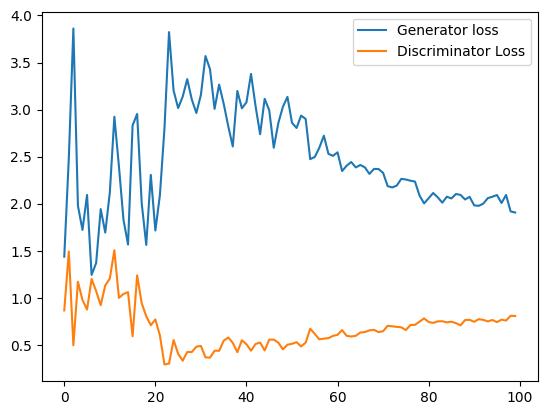

In [17]:
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')